In [1]:
import skimage
import lib.coco_handler as ch
import os
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import measure, morphology
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd
from PIL import Image

import lib.constants as constants
from lib.coco_handler import *
from lib.copy_and_past_augm import *

%load_ext autoreload
%autoreload 2

# Create a new COCO annotation set from masks

This chunks takes an existing annotation file (alternatively creates an empty on)
 and adds instance masks extracted from the binary masks.

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


C:\Users\sebas\.conda\envs\pg\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33434
  "Possibly corrupt EXIF data.  "
C:\Users\sebas\.conda\envs\pg\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33437
  "Possibly corrupt EXIF data.  "
C:\Users\sebas\.conda\envs\pg\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 0. Skipping tag 36867
  "Possibly corrupt EXIF data.  "
C:\Users\sebas\.conda\envs\pg\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 20 bytes but only got 0. Skipping tag 36868
  "Possibly corrupt EXIF data.  "
C:\Users\sebas\.conda\envs\pg\lib\site-packages\PIL\TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7 bytes bu

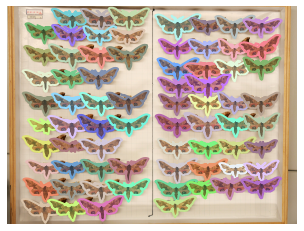

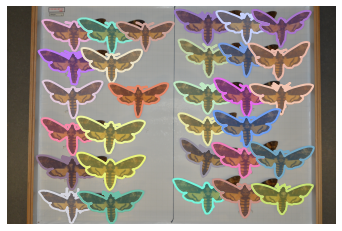

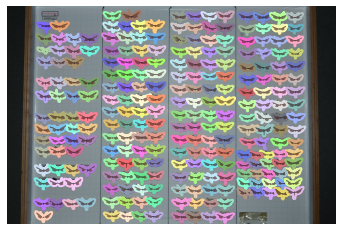

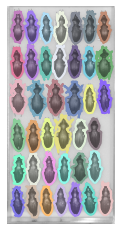

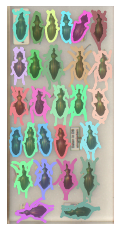

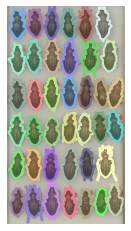

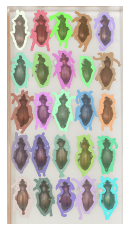

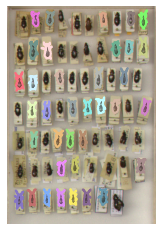

'{"info": {"description": "Data set for segmenting insects", "url": "url", "version": "v0.0.0", "year": "2021", "contributor": ["Sebastian Rassmann"], "date_created": "2021/04/18-00:00:00"}, "categories": [{"id": 1, "name": "Mesembryhmus purpuralis", "supercategory": "Butterfly"}, {"id": 2, "name": "Smerinthus ocellata", "supercategory": "Butterfly"}, {"supercategory": "bug", "id": 3, "name": "bug"}], "images": [{"id": 0, "file_name": "Smerinthus_ocellata.jpg", "width": 5184, "height": 3888, "date_captured": "2021-03-28 22:10:50.716292", "license": 1, "coco_url": "", "flickr_url": ""}, {"id": 1, "file_name": "DSC_6754.JPG", "width": 4928, "height": 3264, "date_captured": "2021-03-28 22:10:50.716292", "license": 1, "coco_url": "", "flickr_url": ""}, {"id": 2, "file_name": "Mesembryhnus_purpuralis.JPG", "width": 4928, "height": 3264, "date_captured": "2021-03-28 22:10:50.716292", "license": 1, "coco_url": "", "flickr_url": ""}, {"img_license": 1, "file_name": "bug_1.tif", "height": 2912,

In [2]:
c = coco_dataset(os.path.join(constants.path_to_anno_dir, "butterfly_anno.json"))
d = os.path.join(constants.path_to_data_dir, "bug_labelling.csv")
d = pd.read_csv(d)
for _, row in d.iterrows():
    c.add_annotation_from_mask(
        os.path.join(constants.path_to_masks_dir, row["mask"]),
        row["crop_image_name"],
        row["rough_class"],
        row["rough_class"],
        min_area=row["min_area"],
    )
c.show_annotations()
c.to_json(os.path.join(constants.path_to_anno_dir, "all_anno.json"))


Now in the file `all_anno.json` all annotations are combined.

# Extract single objects from masks

In [3]:
coco = COCO(os.path.join(constants.path_to_anno_dir, "all_anno.json"))
pc = PatchCreator(constants.path_to_imgs_dir, constants.path_to_masked_objs_dir, coco)
for img in coco.imgs.values():
    pc(img, dilation=3)

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!


100%|██████████| 36/36 [00:00<00:00, 516.38it/s]


This created a folder for each object category and placed the individual objects inside.

You might now want to filter the images for bad quality, partially occluded images etc.

In [4]:
# image Generator